### 🏠 Домашнее задание по линейной регрессии

**Цель:** Изучить методы кодирования признаков и оценить их влияние на обучение регрессионной модели.

**Датасет:** [California Housing Dataset](https://www.kaggle.com/datasets/vikramtiwari/california-housing-dataset-ml-crash-course) (используйте 'california_housing_train.csv')

#### Задание:

1. **📥 Загрузка данных:**
   - Загрузите датасет и ознакомьтесь с его структурой.
   - Выведите размер датасета и рандомные 10 записей (не head и не tail)
   - Найдите и выведите распределение (kde) целевого признака (median_income).
    
    
2. **🔍 Исследовательский анализ данных (EDA):**
    - Выведите количество пропусков в каждом признаке
    - Вывелите количество уникальных значений в каждом признаке
    - Выведите матрицу корреляции признаков
    - Посчитайте корреляцию каждого признака с таргетом и выведите отдельно в виде таблицы (1 колонка, количество строк = количеству признаков)
    - Исследуйте графически топ 3 признака, которые сильнее всего связаны с таргетом (гистограмма, ящик с усами и тд, на свой выбор)
    
    
3. **❌ Заполнение пропусков:**
    - Сделайте выводы (устно) из анализа и выберите признаки, которые можно использовать для обучения модели (Нельзя использовать признаки, которые являются чем-то вроде id)
    - Заполните пропуски в данных (mean для числовых, "unknown" для категориальных)
    - Отмасштабируйте данные с помощью StandartScaler или MinMax (-1,1) на ваш выбор.


4. **🔠 Кодирование категориальных признаков:**
   - Создайте три копии датасета и примените три метода кодирования для категориальных признаков:
     - Label Encoding
     - One-Hot Encoding
     - Target Mean Encoding

5. **📊 Разделение датасета:**
   - Разделите данные на обучающую и тестовую выборки.
   - Напишите функцию самостоятельно, которая принимает на вход y_true и y_pred, и возвращает одно число - MAE. Используйте typing при написании функции (какой тип данных принимает функция, какой возвращает)


6. **📈 Обучение линейной регрессии:**
   - Обучите модель линейной регрессии для каждого из методов кодирования (всего три модели).
   - Выведите по 1 графику для каждой модели, в котором X - самый важный признак из задания 2, y - то, что мы предсказываем.
     График должен содержать скаттерплот всех точек данных и линию регрессии. (Подсказка: нужно найти коэффициенты модели и выбрать нужный)

7. **📋 Сравнение моделей:**
   - Посчитайте точность модели с помощью функции из пункта 5.

8. **📊 Оформление результатов:**
   - Представьте результаты в виде таблицы, которая будет содержать MAE для трех моделей.
   - Сделайте вывод, какой метод кодирования больше подходит в этой задача (письменно).

### 🎉 Успехов в выполнении задания!

#### Задание:
1. **📥 Загрузка данных:**
   - Загрузите датасет и ознакомьтесь с его структурой.
   - Выведите размер датасета и рандомные 10 записей (не head и не tail)
   - Найдите и выведите распределение (kde) целевого признака (median_income).

# Импорт модудей

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, TargetEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

from typing import Union

In [4]:
# Путь к датасету
path = 'https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv'
# path = '../datasets/housing.csv'

# Загрузка датасета
df = pd.read_csv(path)

In [5]:
# Просмотр размера
print(f"Количество строк: {df.shape[0]}, Количество колонок: {df.shape[1]}")

# Просмотр 10 строк (не head и не tail:) не случайные, но все равно 10 )
display(df.sample(10))


Количество строк: 20640, Количество колонок: 10


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
16106,-122.54,37.76,45.0,1592.0,325.0,920.0,322.0,3.9600,272200.0,NEAR OCEAN
5546,-118.40,33.97,44.0,2825.0,453.0,1221.0,461.0,5.9544,377200.0,<1H OCEAN
18025,-121.93,37.25,21.0,1354.0,289.0,639.0,273.0,4.5333,234200.0,<1H OCEAN
12305,-116.71,33.75,25.0,10665.0,2161.0,1874.0,852.0,3.0625,150500.0,INLAND
14732,-117.02,32.81,26.0,1998.0,301.0,874.0,305.0,5.4544,180900.0,<1H OCEAN
10391,-117.65,33.58,2.0,2411.0,354.0,703.0,217.0,7.8061,331400.0,<1H OCEAN
14703,-117.07,32.80,23.0,2698.0,410.0,1094.0,411.0,5.1782,195100.0,<1H OCEAN
11262,-117.99,33.79,29.0,2470.0,560.0,1589.0,513.0,3.1801,190500.0,<1H OCEAN
12738,-121.36,38.63,28.0,6119.0,985.0,2631.0,934.0,4.8750,146400.0,INLAND
12414,-116.21,33.75,22.0,894.0,NaN,830.0,202.0,3.0673,68200.0,INLAND


In [ ]:
# Просмотр статистик числовых признаков
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
# Просмотр статистики строкового признака
df.describe(include='object')

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


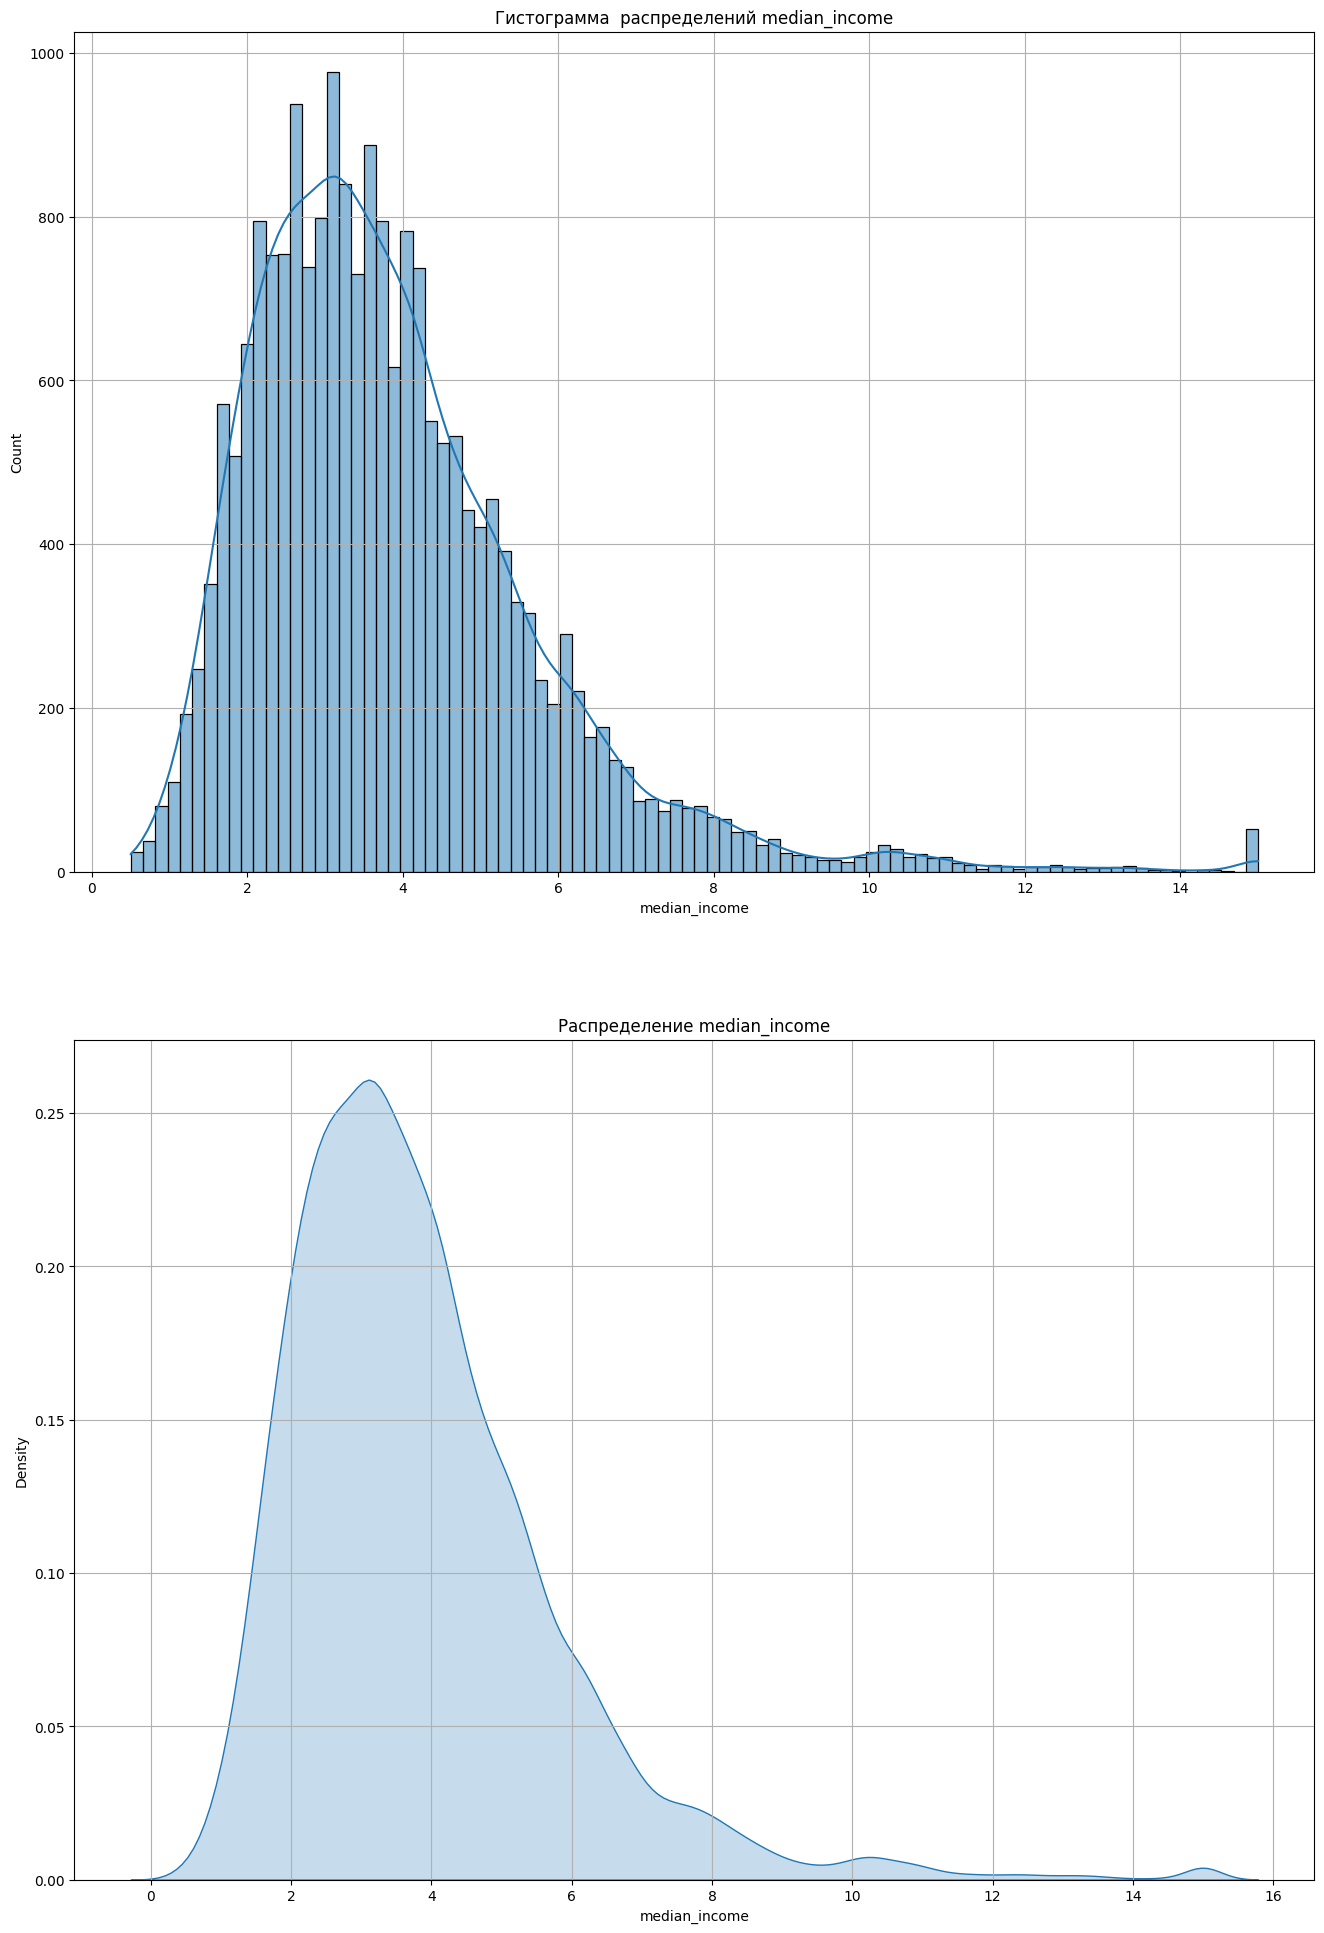

In [ ]:
# Рисую гистограмму и добавил kde, не смог изменить цвет на красный и поэтому создал внижу гистограмму отделно
plt.figure(figsize=(16, 24))
plt.subplot(2, 1, 1)
sns.histplot(df, x='median_income', kde=True, line_kws={'color': 'red'})
plt.title('Гистограмма  распределений median_income')
plt.grid(True)

# Рисую распределение таргета
plt.subplot(2, 1, 2)
sns.kdeplot(df, x='median_income',fill=True)
plt.title('Распределение median_income')
plt.grid(True)
plt.show()

#### Задание:
    
    
2. **🔍 Исследовательский анализ данных (EDA):**
    - Выведите количество пропусков в каждом признаке
    - Вывелите количество уникальных значений в каждом признаке
    - Выведите матрицу корреляции признаков
    - Посчитайте корреляцию каждого признака с таргетом и выведите отдельно в виде таблицы (1 колонка, количество строк = количеству признаков)
    - Исследуйте графически топ 3 признака, которые сильнее всего связаны с таргетом (гистограмма, ящик с усами и тд, на свой выбор)

In [ ]:
# Вывожу пропуски по признаком
df.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
# Вывожу количество уникальных значений
df.nunique()

,0
longitude,844
latitude,862
housing_median_age,52
total_rooms,5926
total_bedrooms,1923
population,3888
households,1815
median_income,12928
median_house_value,3842
ocean_proximity,5


In [ ]:
# Вывожу типы данных признаков
df.dtypes

,0
longitude,float64
latitude,float64
housing_median_age,float64
total_rooms,float64
total_bedrooms,float64
population,float64
households,float64
median_income,float64
median_house_value,float64
ocean_proximity,object


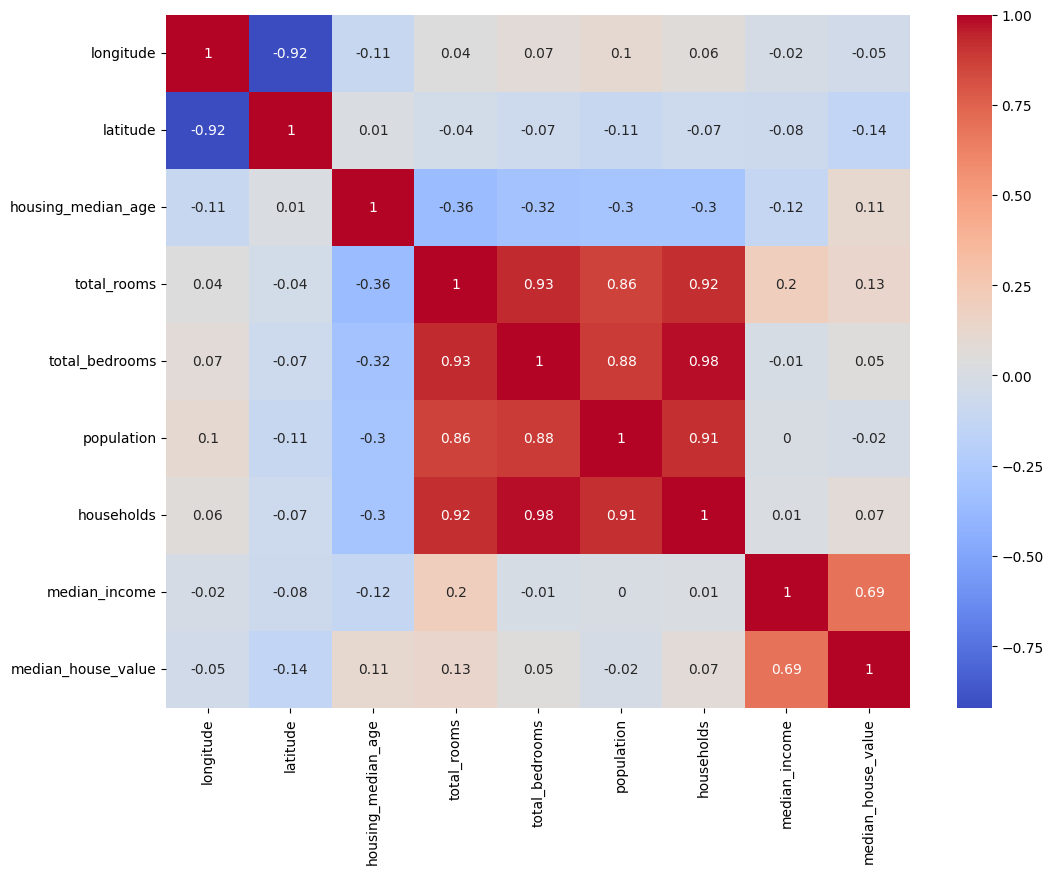

In [ ]:
# Созданю переменную кор. мат. убравь тип object
cor_mat = df.select_dtypes(exclude='object').corr()

# Рисую тепловую карту для кор. мат.
# Выбрал coolwarm чтобы высокая корреляция отображалось ярко красным (ну или синим если она с минусом)
plt.figure(figsize=(12, 9))
sns.heatmap(cor_mat.round(2), annot=True, cmap='coolwarm')
plt.show()

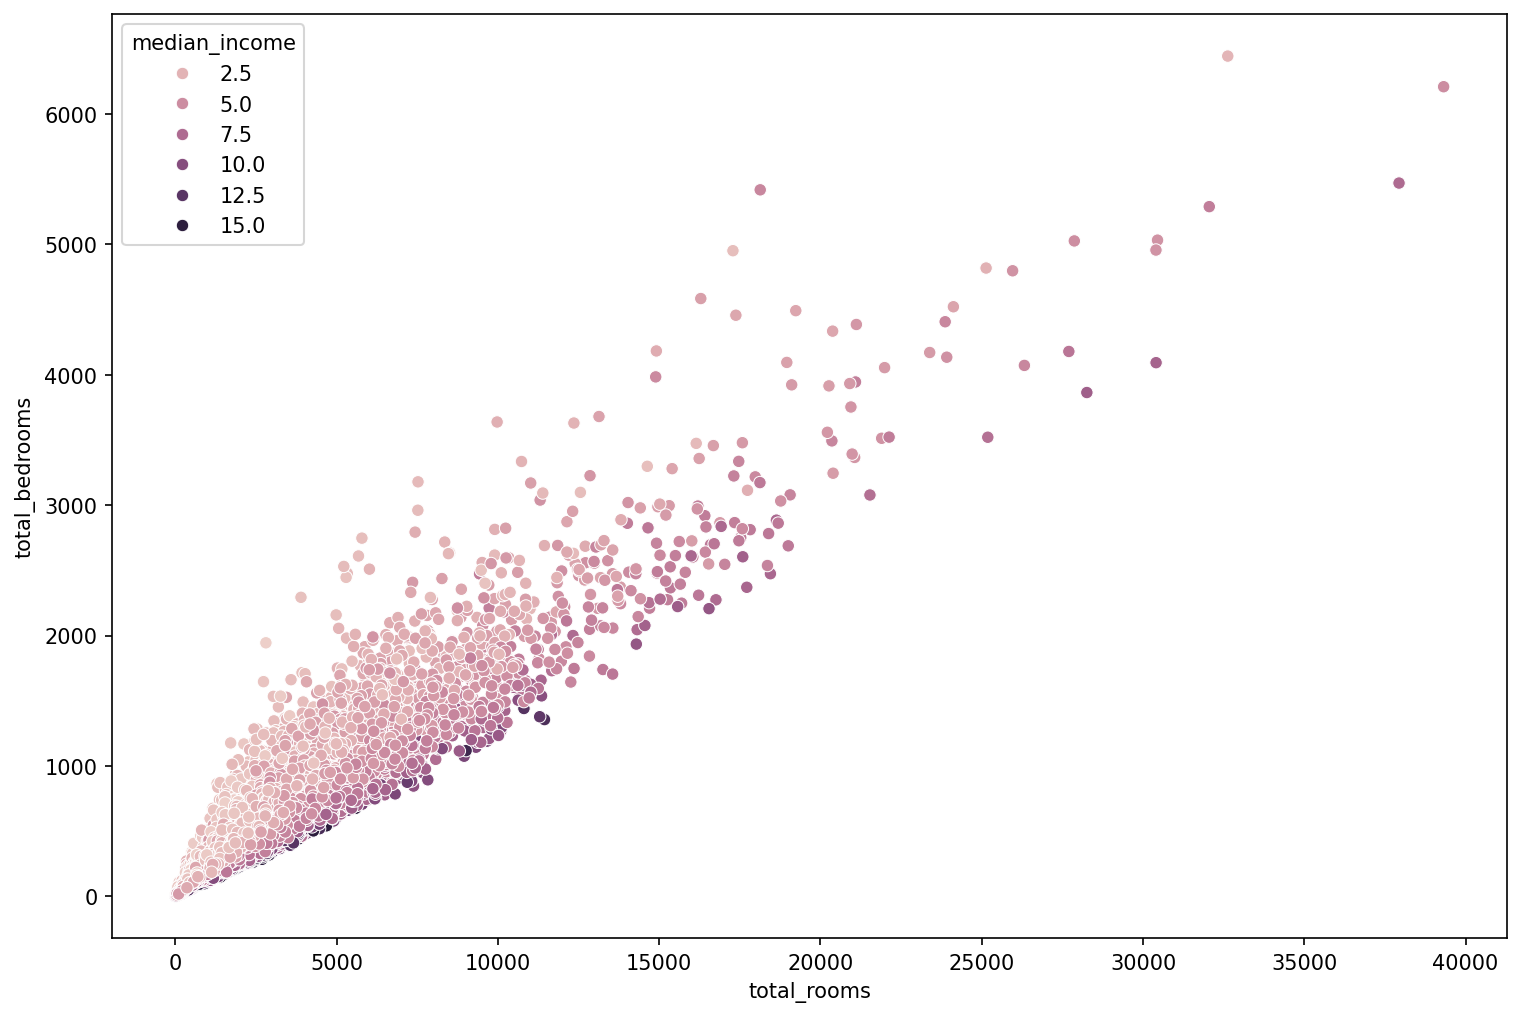

In [ ]:
# Смотрю на признаки с очень очень очень сильним корреляцией между собой по таргету
plt.figure(figsize=(12, 8), dpi=150)
sns.scatterplot(df, x='total_rooms', y='total_bedrooms', hue='median_income')
plt.show()

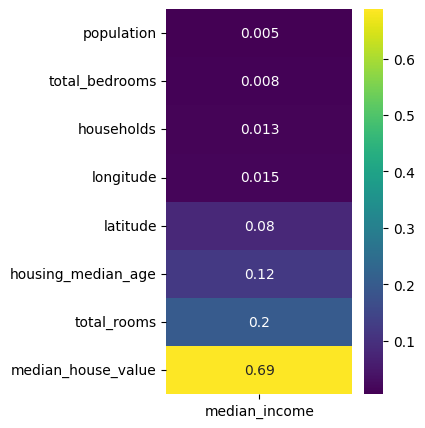

In [ ]:
# Создаю таблицу корреляции убравь корреляцию таргета с самым собой, взявь модуль и отсортировь по возрастанию
# и еще оставить только 3 числа после запятой, я бы оставил два но popularion станет нулюм что не очень-то красиво будет
cor_mat_target = cor_mat[['median_income']].drop('median_income').abs().sort_values('median_income').round(3)

# Рисую таблицу-теплокарту
plt.figure(figsize=(3, 5))
sns.heatmap(cor_mat_target, annot=True, cmap='viridis')
plt.show()

In [ ]:
# Беру топ 3 коррелированных признаков с таргетом и делаю из них список
top3 = cor_mat_target.iloc[-3:].index.tolist()

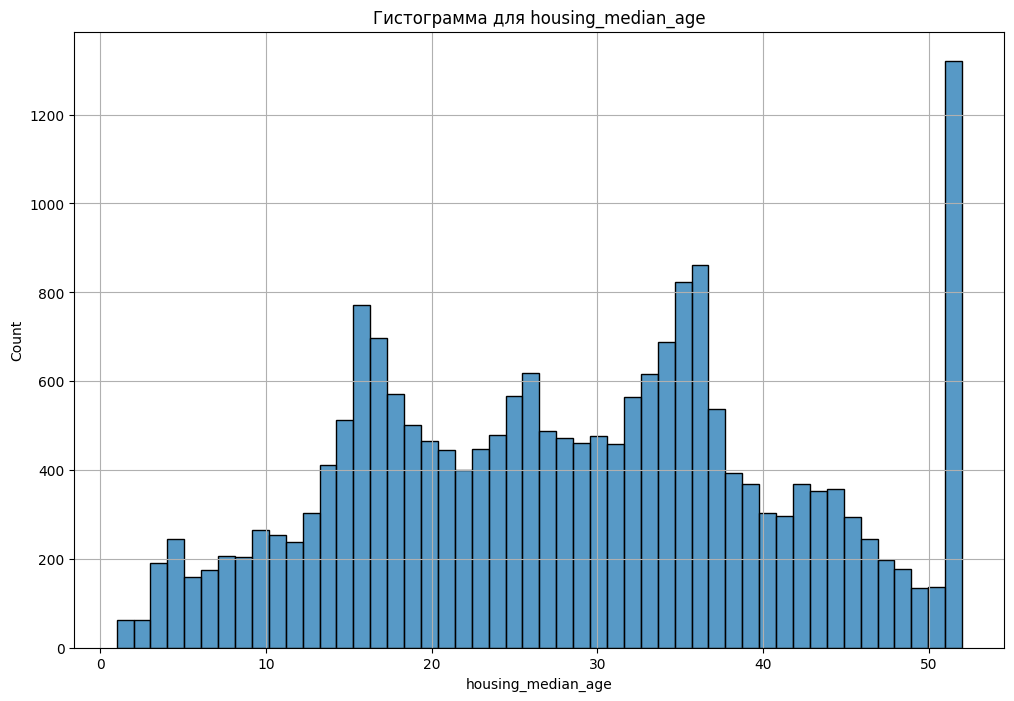

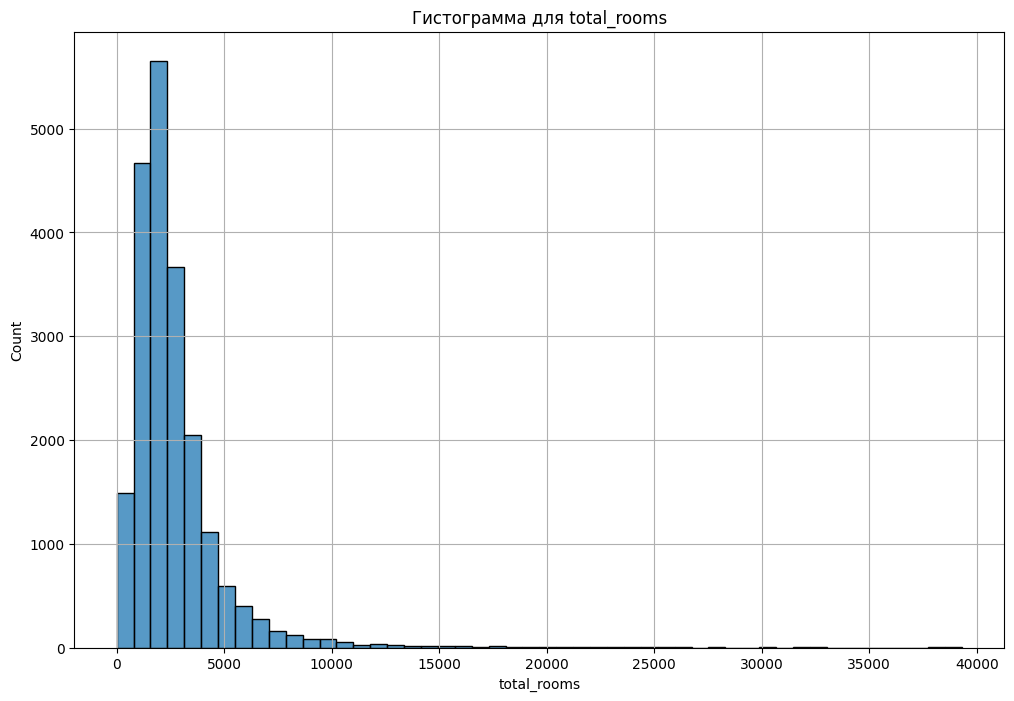

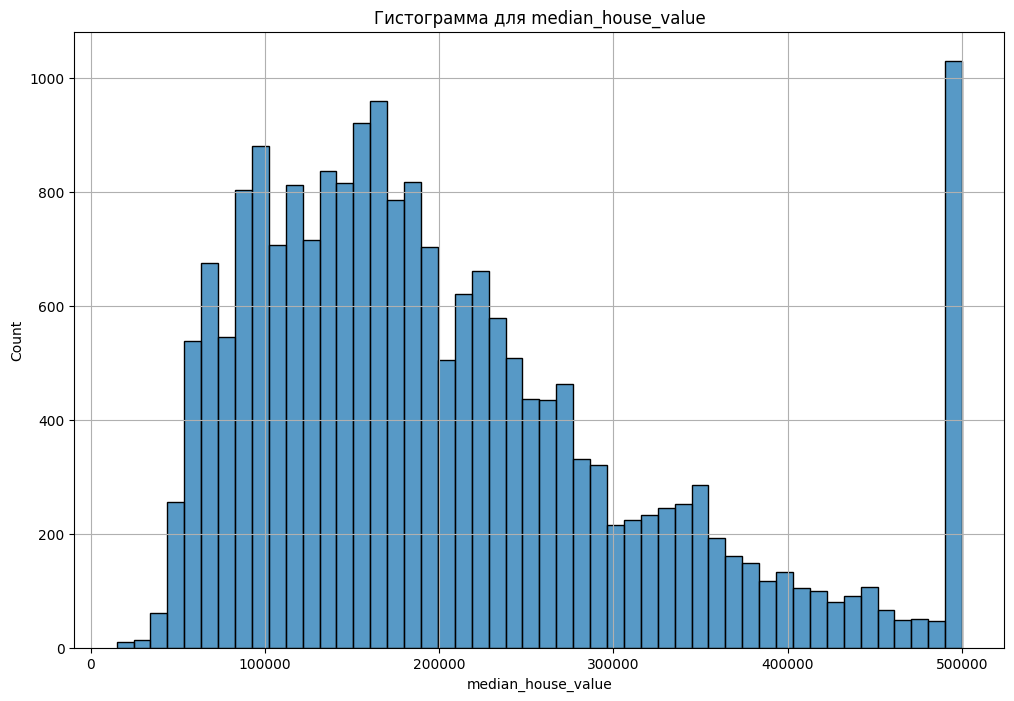

In [ ]:
# Рисую гистограмму из топ 3
for col in top3:
    plt.figure(figsize=(12, 8))
    plt.title(f'Гистограмма для {col}', fontdict={'size': 12})
    sns.histplot(df, x=col, bins=50)
    plt.grid(True)
    plt.show()

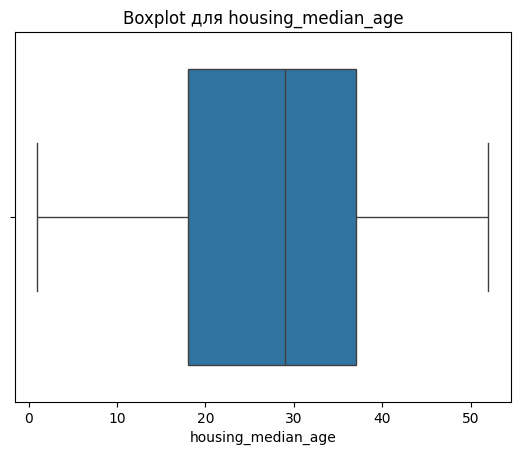

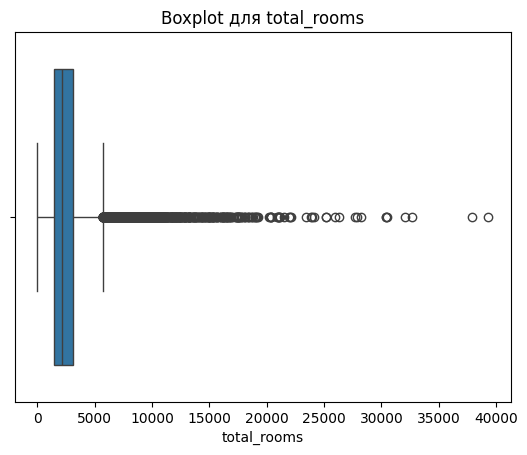

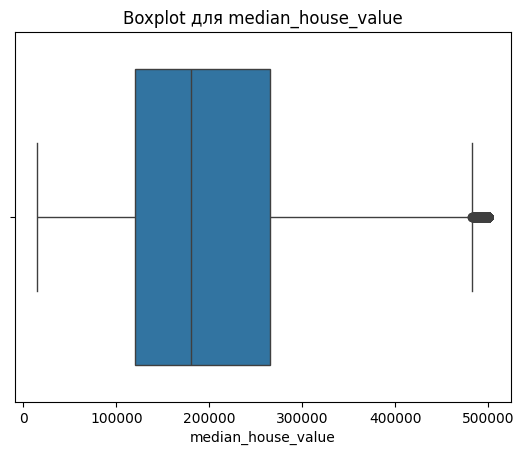

In [ ]:
# Рисую усы Сальвадора Дали для топ 3 признаков
for col in top3:
    plt.title(f'Boxplot для {col}', fontdict={'size': 12})
    sns.boxplot(df, x=col)
    plt.show()

3. **❌ Заполнение пропусков:**
    - Сделайте выводы (устно) из анализа и выберите признаки, которые можно использовать для обучения модели (Нельзя использовать признаки, которые являются чем-то вроде id)
    - Заполните пропуски в данных (mean для числовых, "unknown" для категориальных)
    - Отмасштабируйте данные с помощью StandartScaler или MinMax (-1,1) на ваш выбор.

In [ ]:
# Еще раз проверью признаки на пустоту, но на этот раз чтобы его/их заполнить
df.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
# Смотрю на типы данных, чтобы знать кого чем заполнить
df.dtypes

,0
longitude,float64
latitude,float64
housing_median_age,float64
total_rooms,float64
total_bedrooms,float64
population,float64
households,float64
median_income,float64
median_house_value,float64
ocean_proximity,object


In [ ]:
# Заполяю total_bedrooms средней, сам бы я заполный модой
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].mean())

In [ ]:
# Проверью количество пустых значний чтобы убедиться что все работает
df.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
# Создаю объект класса MinMaxScaler
scaler = MinMaxScaler()

# Делю датасет на таргет и фичи
X_scaled = df.drop('median_income', axis=1).copy()
y = df['median_income']

# Разбеляю фичи число от категориыльнх
cat_columns = X_scaled.select_dtypes(include='object').columns.tolist()
num_columns = X_scaled.select_dtypes(exclude='object').columns.tolist()

# Делаю MinMax для числовых признаков
X_scaled[num_columns] = scaler.fit_transform(X_scaled[num_columns])

# Смотрю на статистики чтобы убедиться что минимум 0 и максимум 1
X_scaled.describe()

# Результат | total_rooms | total_bedrooms | population | households |
# не радует учитывая что на 3-ем процентиле их значения меньше/равно 0.1, но...

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,0.476125,0.328572,0.541951,0.066986,0.083313,0.039869,0.081983,0.395579
std,0.199555,0.226988,0.246776,0.055486,0.065063,0.031740,0.062873,0.237928
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.253984,0.147715,0.333333,0.036771,0.045934,0.021974,0.045881,0.215671
50%,0.583665,0.182784,0.549020,0.054046,0.067815,0.032596,0.067094,0.339588
75%,0.631474,0.549416,0.705882,0.080014,0.099666,0.048264,0.099326,0.514897
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


4. **🔠 Кодирование категориальных признаков:**
   - Создайте три копии датасета и примените три метода кодирования для категориальных признаков:
     - Label Encoding
     - One-Hot Encoding
     - Target Mean Encoding

In [ ]:
# Копирую данные
X_le = X_scaled.copy()

# Создаю объект класса LabelEncoder
le = LabelEncoder()

# Делаю преобразование LabelEncoder
for col in cat_columns:
    X_le[col] = le.fit_transform(X_le[col])

# Проверяю результат
X_le

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_house_value,ocean_proximity
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.902266,3
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.708247,3
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.695051,3
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.672783,3
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.674638,3
...,...,...,...,...,...,...,...,...,...
20635,0.324701,0.737513,0.470588,0.042296,0.057883,0.023599,0.054103,0.130105,1
20636,0.312749,0.738576,0.333333,0.017676,0.023122,0.009894,0.018582,0.128043,1
20637,0.311753,0.732200,0.313725,0.057277,0.075109,0.028140,0.071041,0.159383,1
20638,0.301793,0.732200,0.333333,0.047256,0.063315,0.020684,0.057227,0.143713,1


In [ ]:
# Копирую данные
X_enc = X_scaled.copy()

# Навожу красоту
X_enc['ocean_proximity'] = X_enc['ocean_proximity'].replace('<1H OCEAN', '1H OCEAN').str.replace(' ', '_')
print(X_enc.columns)

# Делаю преобразование OneHotEncoder, хотя по сути dummy encoder
X_enc = pd.get_dummies(X_enc)

# Проверяю результат
X_enc

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_house_value',
       'ocean_proximity'],
      dtype='object')


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_house_value,ocean_proximity_1H_OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR_BAY,ocean_proximity_NEAR_OCEAN
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.902266,False,False,False,True,False
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.708247,False,False,False,True,False
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.695051,False,False,False,True,False
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.672783,False,False,False,True,False
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.674638,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,0.324701,0.737513,0.470588,0.042296,0.057883,0.023599,0.054103,0.130105,False,True,False,False,False
20636,0.312749,0.738576,0.333333,0.017676,0.023122,0.009894,0.018582,0.128043,False,True,False,False,False
20637,0.311753,0.732200,0.313725,0.057277,0.075109,0.028140,0.071041,0.159383,False,True,False,False,False
20638,0.301793,0.732200,0.333333,0.047256,0.063315,0.020684,0.057227,0.143713,False,True,False,False,False


In [ ]:
# Копирую данные
X_te = X_scaled.copy()

# Создаю объект класса TargetEncoder
te = TargetEncoder()

# Делаю преобразование TargetEncoder
X_te[cat_columns] = te.fit_transform(X_te[cat_columns], y)

# Проверяю результат
X_te

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_house_value,ocean_proximity
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.902266,4.167097
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.708247,4.171082
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.695051,4.154644
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.672783,4.167097
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.674638,4.167097
...,...,...,...,...,...,...,...,...,...
20635,0.324701,0.737513,0.470588,0.042296,0.057883,0.023599,0.054103,0.130105,3.214192
20636,0.312749,0.738576,0.333333,0.017676,0.023122,0.009894,0.018582,0.128043,3.217605
20637,0.311753,0.732200,0.313725,0.057277,0.075109,0.028140,0.071041,0.159383,3.205618
20638,0.301793,0.732200,0.333333,0.047256,0.063315,0.020684,0.057227,0.143713,3.209156


5. **📊 Разделение датасета:**
   - Разделите данные на обучающую и тестовую выборки.
   - Напишите функцию самостоятельно, которая принимает на вход y_true и y_pred, и возвращает одно число - MAE. Используйте typing при написании функции (какой тип данных принимает функция, какой возвращает)

In [ ]:
# Разделяю данные LabelEncoder на Train-Test
X_train_le, X_test_le, y_train_le, y_test_le = train_test_split(X_le, y, test_size=0.3, random_state=42)

# Разделяю данные OneHotEncoder на Train-Test
X_train_enc, X_test_enc, y_train_enc, y_test_enc = train_test_split(X_enc, y, test_size=0.3, random_state=42)

# Разделяю данные TargetEncoder на Train-Test
X_train_te, X_test_te, y_train_te, y_test_te = train_test_split(X_te, y, test_size=0.3, random_state=42)

In [ ]:
# Создаю свою функцию MSE
def get_mean_squared_error(y_true: Union[np.ndarray, np.float64], y_pred: Union[np.ndarray, np.float64]) -> np.float64:
    if y_true.size != y_pred.size:
        raise ValueError("Размеры y_true и y_pred не совподают")

    mse = np.mean((y_true-y_pred)**2)
    return mse

In [ ]:
# Создаю свою функцию MAE
def get_mean_absolute_error(y_true: Union[np.ndarray, np.float64], y_pred: Union[np.ndarray, np.float64]) -> np.float64:
    if y_true.size != y_pred.size:
        raise ValueError("Размеры y_true и y_pred не совподают")

    mae = np.mean(np.abs(y_true-y_pred))
    return mae

6. **📈 Обучение линейной регрессии:**
   - Обучите модель линейной регрессии для каждого из методов кодирования (всего три модели).
   - Выведите по 1 графику для каждой модели, в котором X - самый важный признак из задания 2, y - то, что мы предсказываем.
     График должен содержать скаттерплот всех точек данных и линию регрессии. (Подсказка: нужно найти коэффициенты модели и выбрать нужный)

In [ ]:
# Линейная модель model_le
model_le = LinearRegression()
model_le.fit(X_train_le, y_train_le)
y_pred_le = model_le.predict(X_test_le)


# Линейная модель model_en
model_enc = LinearRegression()
model_enc.fit(X_train_enc, y_train_enc)
y_pred_enc = model_enc.predict(X_test_enc)


# Линейная модель model_te
model_te = LinearRegression()
model_te.fit(X_train_te, y_train_te)
y_pred_te = model_te.predict(X_test_te)

In [ ]:
# Проверяю свою финкцию MSE
orignal_mse = mean_squared_error(y_test_le, y_pred_le)
my_mse = get_mean_squared_error(y_test_le, y_pred_le)

print(f'orignal_mse:\t{orignal_mse}')
print(f'my_mse:\t\t{my_mse}')

orignal_mse:	1.3434561918090313
my_mse:		1.3434561918090313


In [ ]:
# Проверяю свою финкцию MAE
orignal_mae = mean_absolute_error(y_test_le, y_pred_le)
my_mae = get_mean_absolute_error(y_test_le, y_pred_le)

print(f'orignal_mae:\t{orignal_mae}')
print(f'my_mae:\t\t{my_mae}')

orignal_mae:	0.7764605349066028
my_mae:		0.7764605349066028


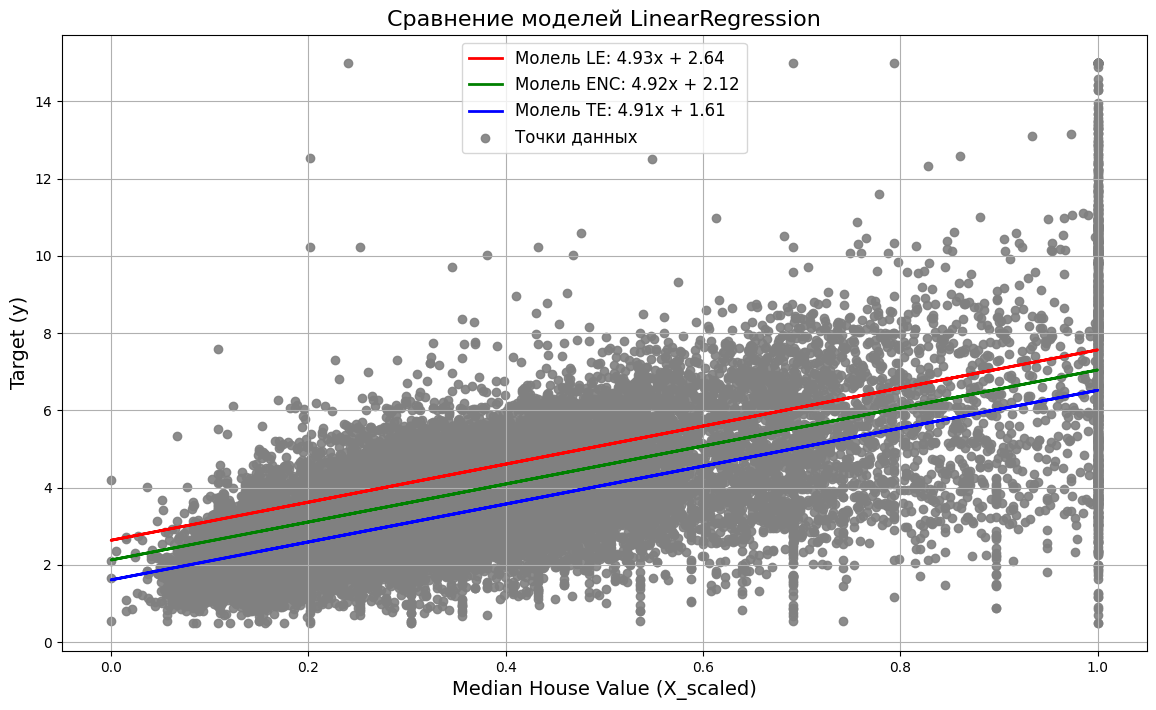

In [ ]:
# Задаю размер графика
plt.figure(figsize=(14, 8))

# Копириую самую фичу с самой высокой корреляцией в x
x = X_scaled['median_house_value'].copy()

# Линейная модель model_le
plt.plot(
    x, model_le.coef_[7] * x + model_le.intercept_,
    linewidth=2, c='r', label=f'Молель LE: {model_le.coef_[7]:.2f}x + {model_le.intercept_:.2f}'
)

# Линейная модель model_enc
plt.plot(
    x, model_enc.coef_[7] * x + model_enc.intercept_,
    linewidth=2, c='g', label=f'Молель ENC: {model_enc.coef_[7]:.2f}x + {model_enc.intercept_:.2f}'
)

# Линейная модель model_te
plt.plot(
    x, model_te.coef_[7] * x + model_te.intercept_,
    linewidth=2, c='b', label=f'Молель TE: {model_te.coef_[7]:.2f}x + {model_te.intercept_:.2f}'
)

# Точки данных, делаю серыми чтобы акцентировать внимание на линии (все как акаи Маъруф учил)
plt.scatter(x, y, c='gray', alpha=0.9, label='Точки данных')

# Рисую график
plt.title('Сравнение моделей LinearRegression', fontsize=16)
plt.xlabel('Median House Value (X_scaled)', fontsize=14)
plt.ylabel('Target (y)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

7. **📋 Сравнение моделей:**
   - Посчитайте точность модели с помощью функции из пункта 5.

In [ ]:
# Находим MAE
mae_le = get_mean_absolute_error(y_test_le, y_pred_le)
mae_enc = get_mean_absolute_error(y_test_enc, y_pred_enc)
mae_te = get_mean_absolute_error(y_test_te, y_pred_te)

# Находим MSE
mse_le = get_mean_squared_error(y_test_le, y_pred_le)
mse_enc = get_mean_squared_error(y_test_enc, y_pred_enc)
mse_te = get_mean_squared_error(y_test_te, y_pred_te)

8. **📊 Оформление результатов:**
   - Представьте результаты в виде таблицы, которая будет содержать MAE для трех моделей.
   - Сделайте вывод, какой метод кодирования больше подходит в этой задача (письменно).

In [ ]:
# Делаю датафреймы из метрик
mae_df = pd.DataFrame(data=[mae_le, mae_enc, mae_te], index=["LabelEncoder", "OneHotEncoder", "TargetEncoder"], columns=['mae']).T
mse_df = pd.DataFrame(data=[mse_le, mse_enc, mse_te], index=["LabelEncoder", "OneHotEncoder", "TargetEncoder"], columns=['mse']).T

# Создаю конечный датафрейм из метрий
res_df = pd.concat([mae_df, mse_df], axis=0)
res_df.round(3)

,LabelEncoder,OneHotEncoder,TargetEncoder
mae,0.776,0.774,0.780
mse,1.343,1.342,1.354


# Результат
Очевидно и MAE, и MSE для OneHotEncoder лучше

# Дополнительный анализ

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
# Считаю метрику MAPE для каждей модели (каждей? или лучше каждого из моделей)
mape_enc = np.round(mean_absolute_percentage_error(y_test_enc, y_pred_enc) * 100, 3)
mape_le = np.round(mean_absolute_percentage_error(y_test_le, y_pred_le) * 100, 3)
mape_te = np.round(mean_absolute_percentage_error(y_test_te, y_pred_te) * 100, 3)

# Делаю датафрейм из метрик
mape_df = pd.DataFrame(data=[mape_le, mape_enc, mape_te], index=["LabelEncoder", "OneHotEncoder", "TargetEncoder"], columns=['mape']).T
mape_df.round(2)

# Смотрю на результат и попадаю в шоковое состояние...
# Продолжение слудет...

# PS. Надеюсь в следущей домашки будет этот же датасет чтобы исправить свои косяки
# также надеюсь мне не снизят баллы за такой стиль комментирования.
# Спасибо за понимание (Не легко делать домашки)

,LabelEncoder,OneHotEncoder,TargetEncoder
mape,24.28,24.23,24.38
